<a href="https://colab.research.google.com/github/ParasCanCode/Image-Classification/blob/master/YOLO_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("hello")

hello


In [3]:
#Import libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

In [4]:
#Load YOLO
net = cv2.dnn.readNet("/content/drive/My Drive/ML/yolov3.weights","/content/drive/My Drive/ML/yolov3.cfg")
classes = []
with open(file="/content/drive/My Drive/ML/coco.names",mode="r") as f:
  classes = [line.strip() for line in f.readlines()]

In [5]:
len(classes)

80

In [6]:
layer_names = net.getLayerNames()

In [7]:
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [8]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [74]:
img = cv2.imread("/content/drive/My Drive/ML/image_yolo.jpg")
img = cv2.resize(img,None,fx=0.4,fy=0.4)
height, width, channel = img.shape

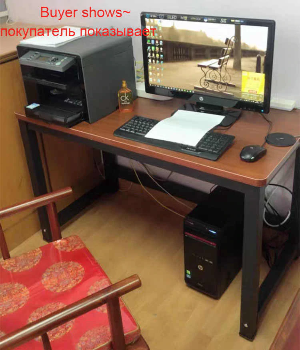

In [75]:
cv2_imshow(img)


In [76]:
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

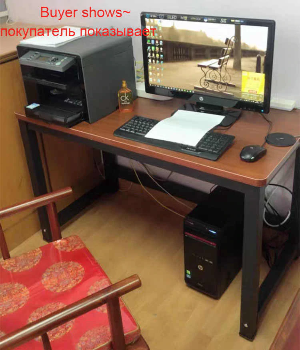

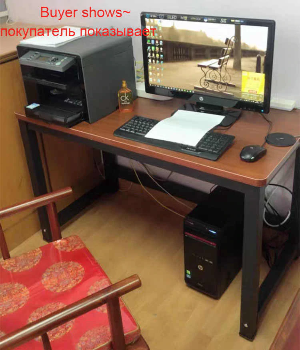

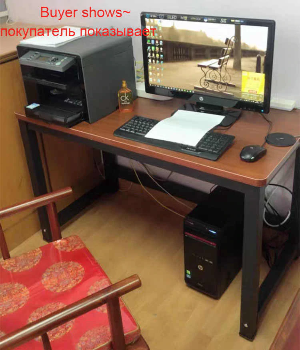

In [77]:
for b in blob:
  for n,img_blob in enumerate(b):
    cv2_imshow(img)

In [78]:
net.setInput(blob)
outs = net.forward(output_layers)
print(outs)

[array([[0.043446  , 0.04611611, 0.40825355, ..., 0.        , 0.        ,
        0.        ],
       [0.05175191, 0.02724416, 0.29183996, ..., 0.        , 0.        ,
        0.        ],
       [0.04752776, 0.03771231, 0.85612404, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9675162 , 0.950189  , 0.38828018, ..., 0.        , 0.        ,
        0.        ],
       [0.96486115, 0.95952356, 0.27740753, ..., 0.        , 0.        ,
        0.        ],
       [0.97495407, 0.9593755 , 0.783487  , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02181472, 0.02856196, 0.055429  , ..., 0.        , 0.        ,
        0.        ],
       [0.02300972, 0.0273818 , 0.2999798 , ..., 0.        , 0.        ,
        0.        ],
       [0.02264012, 0.01959752, 0.07364679, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9713322 , 0.97430986, 0.05324001, ..., 0.        , 0.        ,
        0.        ],
       [0.9795832 

In [79]:
class_ids = []
confidences = []
boxes = []

In [80]:
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence>0.5:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      #cv2.circle(img,(center_x,center_y),10,(0,255,0),1)
      x = int(center_x-(w/2))
      y = int(center_y-(h/2))



      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

      

In [95]:
number_objects_detected = len(boxes)

font = cv2.FONT_HERSHEY_SIMPLEX
colors = np.random.uniform(0,255,size=(len(classes),3))



for i in range(len(boxes)):
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  color = colors[i]
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img,label,(x,y+30),font,1,color,2)
  print(label)


tvmonitor
keyboard
chair
mouse
mouse


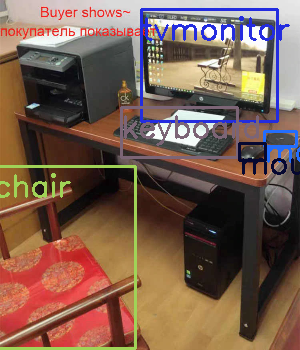

In [96]:
cv2_imshow(img)

In [92]:
print(label)

mouse
